In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix,precision_score
import seaborn as sns

In [2]:
df = pd.read_excel(r"Dry_Bean_Dataset.xlsx")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


The follwoing code calculates the correlation matrix of a DataFrame, creates a heatmap using seaborn, and then displays the heatmap using matplotlib. This visualization helps to visually analyze the relationships and patterns between the variables in the DataFrame based on their correlations.

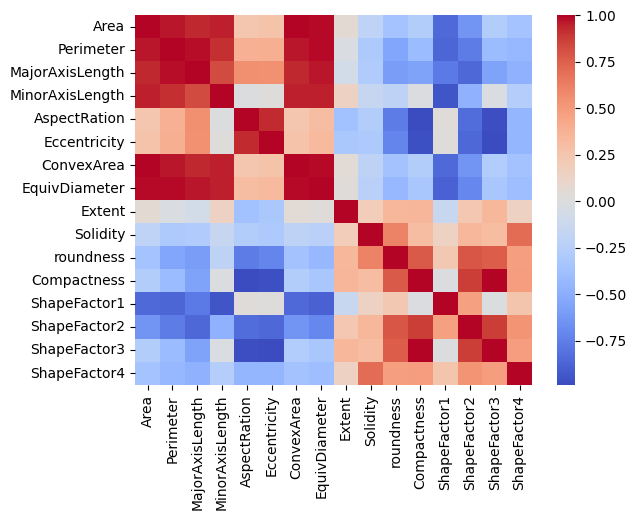

In [3]:
import matplotlib.pyplot as plt
corr = df.iloc[:,:-1].corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

**Data distribution**

In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


**Data types**

In [5]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

**Check for nulls in data**

In [6]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

**Checking class distribution**

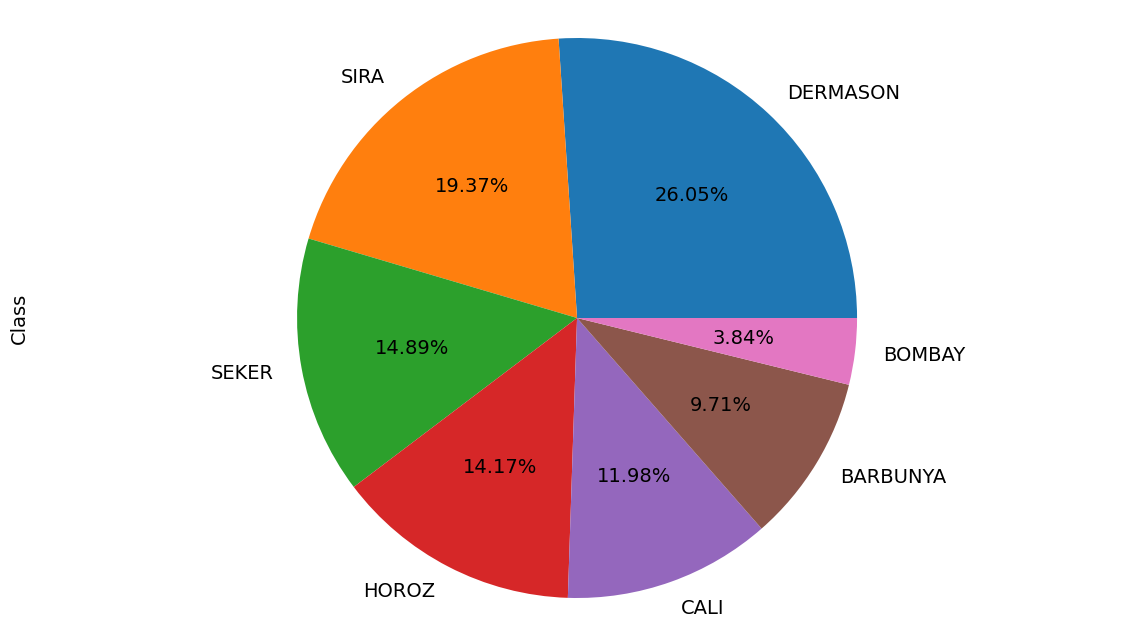

 Target Result 
 DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64 




In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.rc('font', size=14)          # controls default text sizes
df['Class'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.show()
print(" Target Result \n",df['Class'].value_counts(),"\n\n")

This code calculates z-scores for each class of the data in a DataFrame, identifies outlier rows based on a threshold of 3 for the absolute z-scores, creates a new DataFrame without the identified outliers, and finally returns the shape of the resulting DataFrame. This approach allows for the detection and removal of potential outliers from the dataset.

In [9]:
from scipy.stats import zscore
classes = df['Class'].unique()

# New dataframe to store data without outliers
df_no_outliers = pd.DataFrame()

for class_ in classes:
    # Filter dataframe by class
    df_class = df[df['Class'] == class_]
    
    # Calculate z-scores
    z_scores = df_class.iloc[:,:-1].apply(zscore)
    
    # Consider a row an outlier if any of its z-scores is more than 3 (adjustable parameter)
    outlier_rows = np.any(np.abs(z_scores) > 3, axis=1)
    
    # Filter outliers from the dataframe
    df_class_no_outliers = df_class[~outlier_rows]
    
    # Append the dataframe without outliers of this class to the final dataframe
    df_no_outliers = pd.concat([df_no_outliers, df_class_no_outliers])

# Check the shape of the final dataframe
print(df_no_outliers.shape)

(12909, 17)


In [10]:
df_no_outliers

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


The scikit-learn library is used for data preprocessing tasks like feature scaling and label encoding. The code performs label encoding on the 'Class' column, separates the features (X) and labels (y), and then standardizes the features using StandardScaler. The resulting scaled features are stored in X_scaled, and the original indices are stored in ID_column.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Get the features and label from the original dataframe
X = df_no_outliers.iloc[:, :-1]
y = df_no_outliers.iloc[:, -1]

# Label encoding the Class feature
le = LabelEncoder()
df_no_outliers = df_no_outliers.copy()
df_no_outliers.loc[:, 'label'] = le.fit_transform(df_no_outliers.loc[:, 'Class'])

# Creating train and test datasets by defining dependent and independent features
X, y = df_no_outliers.drop(['Class', 'label'], axis=1), df_no_outliers['label']

# Performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
ID_column = df_no_outliers.index.values
ID_column

array([    0,     2,     5, ..., 13608, 13609, 13610])

The provided code snippet demonstrates the usage of the PCA (Principal Component Analysis) algorithm from the scikit-learn library. It initializes a PCA object with a variable number of components to retain (controlled by the components parameter). The PCA is then fit to the scaled data (X_scaled), and the cumulative explained variances (in percentage) of the principal components are printed.

In [12]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# Perform PCA on the scaled data
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 56.67101545  82.93524621  89.84756024  94.98054445  97.77164712
  98.94728109  99.6307472   99.93959452  99.98473969  99.99277705
  99.9978699   99.99922239  99.99994788  99.99998226  99.99999184
 100.        ]



Text(0, 0.5, 'Explained variance (%)')

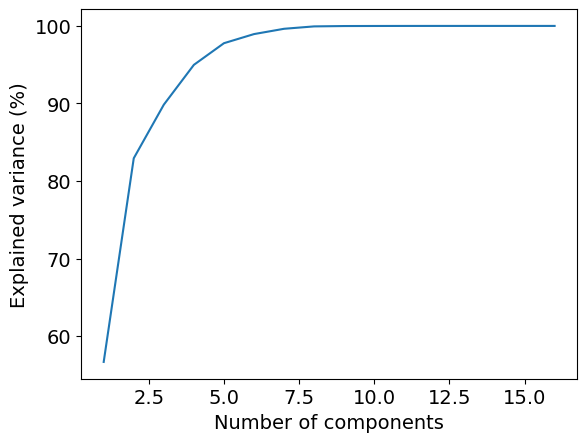

In [13]:
# Plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[56.67101545 82.93524621 89.84756024 94.98054445 97.77164712 98.94728109
 99.6307472  99.93959452 99.98473969 99.99277705]
Number of components: 10


Text(0, 0.5, 'Explained variance (%)')

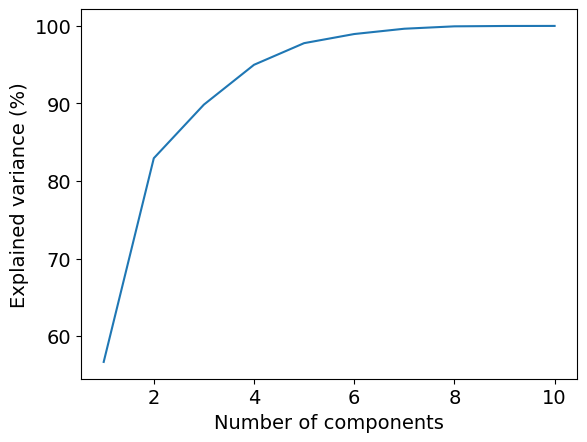

In [14]:
# Source: https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9999)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

The given code calculates the absolute values of the principal component analysis (PCA) components and identifies the top four most important features in each component. It then prints the component number along with the corresponding feature names from the DataFrame. The code iterates through each row of the PCA components, finds the indices of the top four values, sorts them in descending order, and retrieves the feature names associated with those indices for each component.

In [15]:
# Source: https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e
pca_components = abs(pca.components_)
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df_no_outliers.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['MajorAxisLength', 'ShapeFactor2', 'Perimeter', 'EquivDiameter']
Component 1: ['MinorAxisLength', 'ShapeFactor1', 'AspectRation', 'Compactness']
Component 2: ['Solidity', 'ShapeFactor4', 'AspectRation', 'roundness']
Component 3: ['Extent', 'ShapeFactor4', 'Eccentricity', 'ShapeFactor3']
Component 4: ['ShapeFactor4', 'roundness', 'Solidity', 'Extent']
Component 5: ['ShapeFactor1', 'ConvexArea', 'Area', 'Solidity']
Component 6: ['Eccentricity', 'roundness', 'ShapeFactor2', 'ShapeFactor1']
Component 7: ['AspectRation', 'roundness', 'Eccentricity', 'Solidity']
Component 8: ['ShapeFactor2', 'MinorAxisLength', 'MajorAxisLength', 'ShapeFactor1']
Component 9: ['MinorAxisLength', 'ConvexArea', 'Area', 'Perimeter']


In [16]:
X_pca = pca.transform(X_scaled)

In [17]:
df_corr = df_no_outliers.drop(['Class'], axis=1).corr()['label'].abs().sort_values(ascending=False)
df_corr

label              1.000000
Perimeter          0.511068
EquivDiameter      0.484674
ConvexArea         0.480706
Area               0.478396
MinorAxisLength    0.461424
MajorAxisLength    0.459072
roundness          0.402019
ShapeFactor1       0.396969
Solidity           0.394005
ShapeFactor2       0.341860
Eccentricity       0.208723
ShapeFactor4       0.196576
ShapeFactor3       0.174047
Compactness        0.162036
AspectRation       0.120482
Extent             0.032612
Name: label, dtype: float64

This code uses GridSearchCV for inner loop parameter tuning and cross_val_score for the outer loop to estimate the generalization error.

In the following code, the validation and test sets are implicitly defined by the inner and outer loops of the nested k-fold cross-validation process. Here's an explanation of how they are created and used:

Validation set: The inner loop uses GridSearchCV with inner_cv which is a KFold object with 5 splits. In each split, the data is divided into 4 parts for training and 1 part for validation. The GridSearchCV uses these validation sets to determine the best hyperparameters for the model. So, the validation set is used to fine-tune the model's hyperparameters during the inner loop of the nested k-fold cross-validation process.

Test set: The outer loop uses cross_val_score with outer_cv, which is another KFold object with 5 splits. In each split, the data is divided into 4 parts for training (including validation) and 1 part for testing. The cross_val_score function trains the model with the best hyperparameters found in the inner loop (using GridSearchCV) and then evaluates the model on the test set. The test set is used to estimate the generalization error of the model during the outer loop of the nested k-fold cross-validation process.

In [136]:
import numpy as np
from collections import Counter
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

models_and_params = {
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [50, 100,150],
            'learning_rate': [0.1, 0.3],
            'colsample_bytree': [0.3, 0.7, 1]
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}

outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize variables to track the best model and its accuracy
best_accuracy = 0
best_model_name = ""
best_test_set = None

# Loop through each model and perform nested cross-validation
for model_name, model_info in models_and_params.items():
    model = model_info['model']
    params = model_info['params']
    grid_search = GridSearchCV(model, params, scoring='accuracy', cv=inner_cv, n_jobs=-1)

    outer_scores = []
    f1_scores = []
    recall_scores = []
    confusion_matrices = []
    best_params_list = []

    for train_index, test_index in outer_cv.split(X_scaled, y):
        X_train, X_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]

        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params_list.append(grid_search.best_params_)
        y_pred = best_model.predict(X_test)

        # Track the test set with the highest accuracy
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = model_name
            best_test_set = (pd.Series(ID_column[test_index].flatten(), name='ID'),
                             pd.Series(le.inverse_transform(y_pred), name='Prediction'))

        outer_scores.append(accuracy)
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

    mean_accuracy = np.mean(outer_scores)
    mean_f1 = np.mean(f1_scores)
    mean_recall = np.mean(recall_scores)

    print(f"{model_name} - Mean Accuracy: {mean_accuracy:.4f}")
    print(f"{model_name} - Mean F1 Score: {mean_f1:.4f}")
    print(f"{model_name} - Mean Recall: {mean_recall:.4f}")

    for i, matrix in enumerate(confusion_matrices):
        print(f"{model_name} - Confusion Matrix {i+1}:\n{matrix}")

    # Count the occurrences of the best parameters for each outer fold
    param_counts = Counter(tuple(param_set.items()) for param_set in best_params_list)
    most_common_params = param_counts.most_common(1)[0][0]
    
    print(f"{model_name} - Overall Best Parameters: {dict(most_common_params)}\n")

# Save only the test set with the highest accuracy
best_results_df = pd.concat(best_test_set, axis=1)
best_results_df.to_csv(f"{best_model_name}_best.csv", index = False)

XGBoost - Mean Accuracy: 0.9400
XGBoost - Mean F1 Score: 0.9400
XGBoost - Mean Recall: 0.9400
XGBoost - Confusion Matrix 1:
[[252   0   9   0   0   0   7]
 [  0 101   0   0   0   0   0]
 [ 10   0 288   0   1   0   1]
 [  0   0   0 597   0   8  47]
 [  0   0   6   0 370   0   3]
 [  0   0   0  13   0 364   4]
 [  1   0   0  36   4   4 456]]
XGBoost - Confusion Matrix 2:
[[237   0   7   0   0   0   2]
 [  0  86   0   0   0   0   0]
 [  6   0 310   0   8   0   0]
 [  0   0   0 613   0   9  51]
 [  2   0   3   0 343   0   8]
 [  1   0   0   4   0 377   5]
 [  0   0   0  42  11   2 455]]
XGBoost - Confusion Matrix 3:
[[222   0  19   0   1   2   5]
 [  0 101   0   0   0   0   0]
 [  5   0 313   0   5   0   3]
 [  0   0   0 629   0   4  38]
 [  0   0   5   1 340   0   5]
 [  0   0   0   5   0 367   4]
 [  0   0   1  43   5   1 458]]
XGBoost - Confusion Matrix 4:
[[232   0  12   0   0   0   3]
 [  0 104   0   0   0   0   0]
 [  6   0 303   0   2   0   2]
 [  0   0   0 647   0   4  37]
 [  1   